# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Carlos David Amezcua Canales

- ID: A01641742

- My carreer: Ingeniería en Tecnologías Computacionales


# Importing libraries

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

# PART 1
# Use your assigned dataset

## A1 Load data

In [117]:
# Define where you are running the code: colab or local
RunInColab = True # (False: no | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta = ""

# Dataset url
url = Ruta + "/datasets/A01641742/A01641742.csv"

# Load the dataset
df  = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## A2 Data managment


Print the first 7 rows

In [118]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,1.863897,0.277567
1,1,1.300167,-0.509895
2,2,-0.787361,0.294940
3,3,0.234474,0.009165
4,4,0.213367,-0.129235
5,5,0.229590,-0.101527
6,6,0.293487,0.063462


Print the first 4 last rows

In [119]:
df.tail(4)

,Unnamed: 0,x1,x2
1246,1246,-1.002940,0.209688
1247,1247,-0.410444,0.845425
1248,1248,0.850914,0.328372
1249,1249,0.567495,-0.271324


How many rows and columns are in your data?

Use the `shape` method


In [120]:
rows, columns = df.shape
print("Rows: {}".format(rows))
print("Columns: {}".format(columns))

Rows: 1250
Columns: 3


Print the name of all columns 

Use the `columns` method

In [121]:
for i in df.columns:
    print(i)

Unnamed: 0
x1
x2


What is the data type in each column

Use the `dtypes` method 

In [122]:
print(df.dtypes)

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object


What is the meaning of rows and columns?

In [123]:
# Your responses here

'''
In general, rows and columns refer to the horizontal and vertical components of 
a table or matrix.

In the context of a table, rows are the horizontal lines of data, and each row 
typically represents a single record or observation. 

Columns, on the other hand, are the vertical lines of data in a table, and each 
column typically represents a specific variable or feature.
'''

'\nIn general, rows and columns refer to the horizontal and vertical components of \na table or matrix.\n\nIn the context of a table, rows are the horizontal lines of data, and each row \ntypically represents a single record or observation. \n\nColumns, on the other hand, are the vertical lines of data in a table, and each \ncolumn typically represents a specific variable or feature.\n'

Print a statistical summary of your columns


In [124]:
df.describe()

,Unnamed: 0,x1,x2
count,1250.000000,1250.000000,1250.000000
mean,624.500000,0.504227,0.248489
std,360.988227,0.870859,0.502999
min,0.000000,-1.312542,-0.706822
25%,312.250000,-0.085273,-0.192843
50%,624.500000,0.504187,0.251080
75%,936.750000,1.069560,0.694035
max,1249.000000,2.243399,1.241571


In [125]:
# 1) What is the minumum and maximum values of each variable

for i in df.columns:
  print("min({}) = {}".format(i, df[i].min()))
  print("max({}) = {}".format(i, df[i].max()))
  print()

min(Unnamed: 0) = 0
max(Unnamed: 0) = 1249

min(x1) = -1.3125424680065472
max(x1) = 2.24339943573144

min(x2) = -0.7068223881781435
max(x2) = 1.2415712655983524



In [126]:
# 2) What is the mean and standar deviation of each variable

for i in df.columns:
  print("mean({}) = {}".format(i, df[i].mean()))
  print("std({}) = {}".format(i, df[i].std()))
  print()

mean(Unnamed: 0) = 624.5
std(Unnamed: 0) = 360.9882269548413

mean(x1) = 0.5042274378413598
std(x1) = 0.8708585144209672

mean(x2) = 0.24848921192017634
std(x2) = 0.5029985086583644



In [127]:
# 3) What the 25%, 50% and 75% represent?

'''
The 25th, 50th, and 75th percentiles represent the values below which 25%, 50%, 
and 75% of the data falls, respectively, when sorted in ascending order.
'''

'\nThe 25th, 50th, and 75th percentiles represent the values below which 25%, 50%, \nand 75% of the data falls, respectively, when sorted in ascending order.\n'

Rename the columns using the same name with capital letters

In [128]:
original_columns = df.columns

df.columns = df.columns.str.upper()

for i in df.columns:
    print(i)

UNNAMED: 0
X1
X2


Rename the columns to their original names

In [129]:
df.columns = original_columns

for i in df.columns:
    print(i)

Unnamed: 0
x1
x2


Use two different alternatives to get one of the columns

In [130]:
print(df.x1)
print(df["x1"])

0       1.863897
1       1.300167
2      -0.787361
3       0.234474
4       0.213367
          ...   
1245    0.992277
1246   -1.002940
1247   -0.410444
1248    0.850914
1249    0.567495
Name: x1, Length: 1250, dtype: float64
0       1.863897
1       1.300167
2      -0.787361
3       0.234474
4       0.213367
          ...   
1245    0.992277
1246   -1.002940
1247   -0.410444
1248    0.850914
1249    0.567495
Name: x1, Length: 1250, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [131]:
print(df.iloc[62 : 72 + 1, 1 : 2 + 1])

          x1        x2
62  1.926623  0.360629
63  1.289624 -0.410643
64  0.014530  0.363414
65  0.530334  1.030767
66 -0.108996  0.921655
67  1.873780 -0.121947
68 -0.175515  1.039062
69 -1.087571  0.349095
70  2.012119  0.502053
71  0.550993 -0.138710
72  1.203358 -0.479014


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [132]:
for col in df.iloc[:, 1:2 + 1]:
    null_count = df[col].isnull().sum()
    not_null_count = df[col].notnull().sum()
    print("{} has {} null values and {} not null values".format(col, null_count, not_null_count))
    sum = null_count + not_null_count
    print("which add up to {}, an amount {} to the the total number of rows."
          .format(sum, "EQUAL" if sum == df.shape[0] else "DIFFERENT"))
    print()

x1 has 0 null values and 1250 not null values
which add up to 1250, an amount EQUAL to the the total number of rows.

x2 has 0 null values and 1250 not null values
which add up to 1250, an amount EQUAL to the the total number of rows.



Discard the last/first column


In [133]:
df = df.drop(df.columns[0], axis=1)

### Questions 

Based on the previos results, provide a description of yout dataset

Your response: My dataset consists of 1250 records of two floating-point variables, with zero null values.




## A3 Data visualization

Plot in the same figure the histogram of the two variables

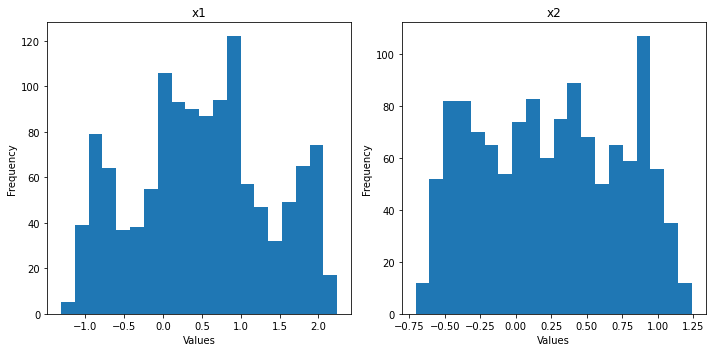

In [157]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=20)
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on this plots, provide a description of your data:

Your response here: the data appear to have a quadrimodal distribution.

Plot in the same figure the boxplot of the two variables 

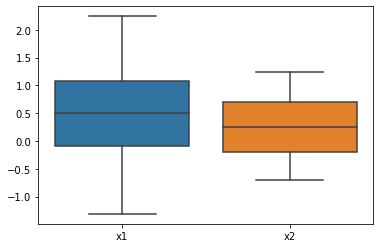

In [150]:
sns.boxplot(data=df)
plt.show()

Scatter plot of the two variables

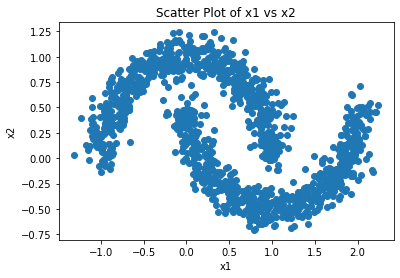

In [158]:
# Create scatter plot
plt.scatter(df["x1"], df["x2"])

# Add axis labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 vs x2')

# Show plot
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: the dataset appears to be made up of two c-shaped clusters looking at each other.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [194]:
# Define number of clusters
K = 2

# Do K-means clustering (assing each point in the dataset to a cluster) 
km = KMeans(n_clusters=K, n_init="auto")
labels = km.fit_predict(df)

Add to your dataset a column with the assihned cluster to each data point

In [195]:
df["cluster"] = labels
df

,x1,x2,cluster
0,1.863897,0.277567,1
1,1.300167,-0.509895,1
2,-0.787361,0.294940,0
3,0.234474,0.009165,0
4,0.213367,-0.129235,0
...,...,...,...
1245,0.992277,0.142266,1
1246,-1.002940,0.209688,0
1247,-0.410444,0.845425,0
1248,0.850914,0.328372,1


Print the number associated to each cluster

In [196]:
print(df.cluster.unique())

[1 0]


Print the centroids

In [197]:
print(km.cluster_centers_)

[[-0.19569776  0.58111914  0.        ]
 [ 1.20415264 -0.08414072  1.        ]]


Print the intertia metric

In [198]:
print(km.inertia_)

512.5687147086367


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

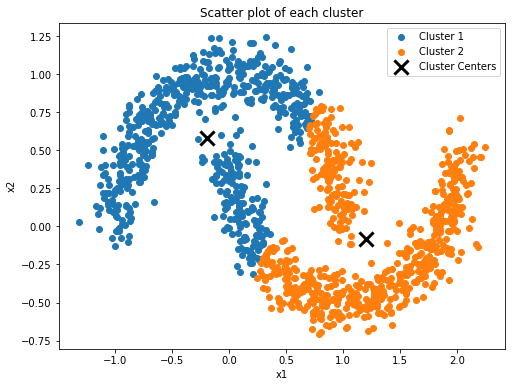

In [199]:
# Get a dataframe with the data of each clsuter
cluster_dfs = [df[df["cluster"] == i] for i in range(K)]

# Scatter plot of each cluster
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["x1"], cluster_dfs[i]["x2"], label=f"Cluster {i+1}")
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Cluster Centers")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Scatter plot of each cluster")
ax.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response: The algorithm couldn't assign each 'c' to a different cluster, it mixed them up.

## A5 Elbow plot

Compute the Elbow plot

In [202]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
ks = range(1, 10)

# For each k
for k in ks:
    # Initialize KMeans object with the number of clusters
    km = KMeans(n_clusters=k, n_init="auto")

    # Fit KMeans object to the data
    km.fit(df)

    # Get sum of squared error (sse) of the final model
    sse.append(km.inertia_)

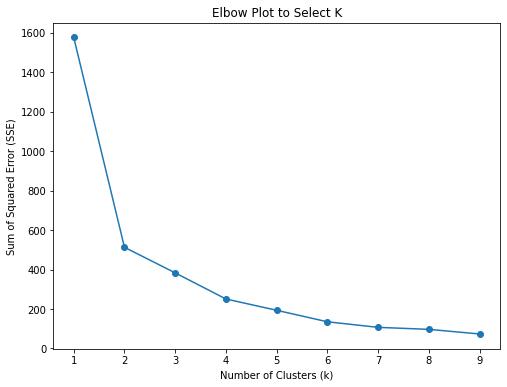

In [205]:
# Plot sse versus k

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks, sse, marker="o")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Sum of Squared Error (SSE)")
ax.set_title("Elbow Plot to Select K")
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: 2, because it is the point of inflection where the rate of decrease in SSE slows down significantly.


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Yes, I originally guessed 2.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [237]:
# ID = A01641742
n_samples = 742
n_features = 3
centers = 4
cluster_std = 1.5
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)
df = pd.DataFrame(data=X, columns=['x1', 'x2', 'x3'])
df["real_cluster"] = y
df

,x1,x2,x3,real_cluster
0,0.674644,-3.199026,-8.530792,2
1,3.181810,-5.423756,-8.080246,2
2,0.357288,3.368210,-10.168542,3
3,-3.005129,3.462648,6.555851,1
4,4.154162,-4.768698,-11.455111,2
...,...,...,...,...
737,1.221773,-1.437154,-7.042937,2
738,-4.190050,-1.893462,6.148524,1
739,4.437507,7.848603,-8.465534,0
740,-2.152066,1.571026,9.523092,1


2) Plot the scatter plot of your data using the real cluster labels

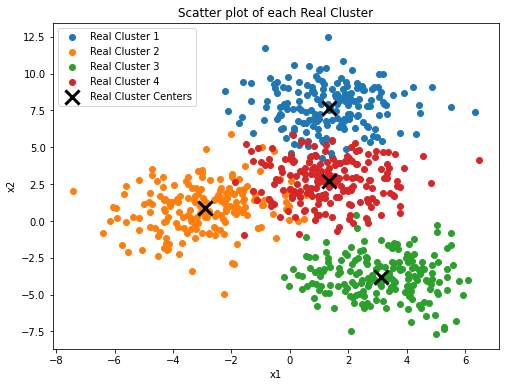

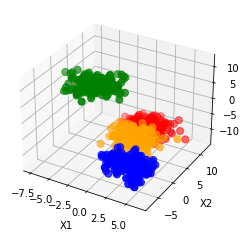

In [245]:
# Get a dataframe with the data of each clsuter
cluster_dfs = [df[df["real_cluster"] == i] for i in range(K)]
# Scatter plot of each cluster
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["x1"], cluster_dfs[i]["x2"], label=f"Real Cluster {i+1}")
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Real Cluster Centers")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Scatter plot of each Real Cluster")
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Set the color for each point based on the cluster label
colors = ['red', 'green', 'blue', 'orange']
colormap = [colors[label] for label in df["real_cluster"]]
# Create the 3D scatter plot
ax.scatter(X[:,0], X[:,1], X[:,2], c=colormap, s=50)
# Set the labels for each axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
# Show the plot
plt.show()

3) Do K means clustering 

In [240]:
# Define number of clusters
K = 4

# Do K-means clustering (assing each point in the dataset to a cluster) 
km = KMeans(n_clusters=K, n_init="auto")
labels = km.fit_predict(df)
df["estimated_cluster"] = labels

4) Plot the scatter plot of your data using the estimated cluster labels

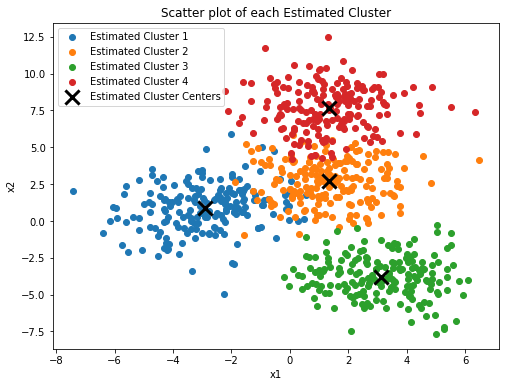

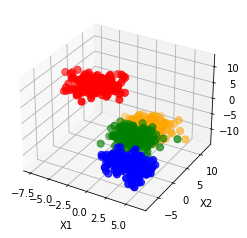

In [246]:
# Get a dataframe with the data of each clsuter
cluster_dfs = [df[df["estimated_cluster"] == i] for i in range(K)]

# Scatter plot of each cluster
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(K):
    ax.scatter(cluster_dfs[i]["x1"], cluster_dfs[i]["x2"], label=f"Estimated Cluster {i+1}")
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c="black", marker="x", s=200, linewidths=3, label="Estimated Cluster Centers")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Scatter plot of each Estimated Cluster")
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Set the color for each point based on the cluster label
colors = ['red', 'green', 'blue', 'orange']
colormap = [colors[label] for label in df["estimated_cluster"]]
# Create the 3D scatter plot
ax.scatter(X[:,0], X[:,1], X[:,2], c=colormap, s=50)
# Set the labels for each axis
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
# Show the plot
plt.show()

In [266]:
# Compute performance metrics
silhouette_score_val = silhouette_score(df[["x1", "x2", "x3"]], labels)
adjusted_rand_score_val = adjusted_rand_score(df["real_cluster"], labels)
homogeneity_score_val = homogeneity_score(df["real_cluster"], labels)

# Finally, we can print the performance metrics and compare the three clustering solutions:
print("Clustering using all four features:")
print("Silhouette score:", silhouette_score_val)
print("Adjusted Rand index:", adjusted_rand_score_val)
print("Homogeneity score:", homogeneity_score_val)
print()

Clustering using all four features:
Silhouette score: 0.5349062785961283
Adjusted Rand index: 0.9892913224589107
Homogeneity score: 0.9832139260541602



### Questions 

Provides a detailed description of your results.

Your response: Based on the achieved homogeneity score of 0.98, the K means algorithm did a very good job clustering the data.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Para el criterio de interpretación de interacciones, considero que mi nivel de desarrollo es avanzado. Me siento cómodo identificando y entendiendo las interacciones entre variables relevantes en un problema y utilizándolas como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que me permita reproducir su respuesta.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: En cuanto a la construcción de modelos bivariados, creo que tengo un buen nivel. Soy capaz de construir modelos que expliquen el comportamiento de un fenómeno en función de dos variables relevantes. Aunque siento que todavía tengo mucho que aprender en esta área para mejorar mi capacidad de modelado y hacer predicciones más precisas. Por ejemplo, noté que el algoritmo de Kmeans hace un cluster poco adecuado de los datos en forma de dos C's, pero no conozco otro algoritmo para hacer un mejor clustering.